In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from senticnet.senticnet import SenticNet
import statistics
import textblob
import spacy
import math
import re, string
from textblob import TextBlob
from string import punctuation

In [5]:
comments = pd.read_csv('./comment-assets/newman-old.csv')
sentic_polarities = pd.read_table('./senticnet5.txt', sep=r"\s*")
sn = SenticNet()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.6/site-packages/pandas/io/parsers.py:2227: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/usr/local/lib/python3.6/site-packages/pandas/io/parsers.py:2229: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [9]:
tokenizer = spacy.load('en')
tokens = tokenizer(comments['commentText'][0])

tokens

Yay Jordan B Peterson!  MSM reporter was not so good.

In [5]:
type(tokens)

spacy.tokens.doc.Doc

In [33]:
giant_comment = ''

for idx, comment in comments.iterrows():
    giant_comment += str(comments['commentText'][idx])

In [43]:
uniques = set(giant_comment.split(' '))

In [13]:
clean_comments = []
punct = [',', '.']

for idx, comment in comments.iterrows():
    clean_comment = ''
    for character in str(comment['commentText']):
        # pattern = re.compile('[\W_]+')
        lower = re.compile(r"[a-z]")
        upper = re.compile(r"[A-Z]")
        if character in punct or character == ' ':
            clean_comment += ' '
        elif character in lower.sub('', string.printable) or character in upper.sub('', string.printable):
            clean_comment += character
    clean_comments.append(clean_comment)
    
len(clean_comments)

56910

In [14]:
comments['Cleaned'] = pd.Series(clean_comments)

In [15]:
comments['Cleaned'][0:20]

0     Yay Jordan B Peterson!  MSM reporter was not s...
1     Jordan Peterson on the Channel 4 Controversy: ...
2     This woman must be a special type of stupid  c...
3     Fact: The ability to think is regulated by you...
4     Honestly there are 25 biologicaly and biochemi...
5     Everyone should watch this clip    You won't r...
6     Gets Jordan Peterson in interview \nGets 3 mil...
7     After watching it a second time I have some re...
8     I kinda feel sorry for her  She is either inte...
9     I have never seen someone dominate an argument...
10    It's incredible how wilfully she misunderstand...
11    Wow she is awful  Who decided she should talk ...
12    You're saying   so you're saying    stfu    wh...
13    Cathy Newman is the kind harpy no rational  sa...
14    Cathy Newman exposes her prejudice and extreme...
15    Athletics; watch the program ultimate beastmas...
16    0:38  - "You're saying it's a crisis of mascul...
17    This man will be looked upon as a symbolic

In [54]:
stop_count = 0

for idx, comment in comments.iterrows():
    comment_polarity = []
    for word in comments['Cleaned'][idx]:
        if not tokenizer.vocab[str(comment)].is_stop:
            #stop_count += 1
            comment_polarity.append(sn.polarity_intense(str(word))
            
stop_count

KeyboardInterrupt: 

In [45]:
unique_tokens = []

for unique in uniques:
    unique_tokens.append(tokenizer(unique))
    
len(unique_tokens)

KeyboardInterrupt: 

In [41]:
string_of_uniques = ''

for unique in uniques:
    string_of_uniques += ' '
    string_of_uniques += unique
    
len(string_of_uniques)

1055650

In [42]:
new_tokens = tokenizer(string_of_uniques)
len(new_tokens)

ValueError: [E088] Text of length 1055650 exceeds maximum of 1000000. The v2.x parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

In [40]:
print(new_tokens[0:50])

brain.
Greetingssaying."

"I'mNEXTLEGAL#sowhatursayingisnannannannannannannannannannannannannannannannannannannannannannan14:00topic/questionsaying.....elephantsextreme-leftfraud!Sopresenter.The"yesemployed?
Responsibilityconversation?game.C4TYT/Cenkoptics"camps"rope,FUCK.PresidentFacialapprentice-plumberco-existHow.nanThis-CathyjewJordan'sspoutissue.Superbtrick..."News)Cathy-once.Mysupposedchange"?Isdistort,capability)'ever..
Justsystems...

Interviewer:seemed


In [16]:
for token in tokens:
    # print(token)
    # print(type(token))
    try:
        print(token, ' ', sn.polarity_intense(str(token)))
    except Exception as e:
        pass

reporter   0.762
good   0.849


In [48]:
sn.polarity_intense('was')

KeyError: 'was'

In [ ]:
tokenized_comments = []

for comment in clean_comments:
    tokens_list = []
    # Break comments into tokens
    tokens = tokenizer(str(comment))
    for token in tokens:
        if not token.is_punct or not token.is_stop:
            tokens_list.append(token)
    # tokens_list.append(tokens for token in tokens if not token.is_punct or token.is_stop)
    # above line of code changes token to generator object???
    
    tokenized_comments.append(tokens_list)
    
    count += 1
    if count % 5000 == 0:
        print(count)
    
len(tokenized_comments)

In [9]:
text = '''
The titular threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungry, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact.
Snide comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by technological theorists fearful of
artificial intelligence run rampant.
'''

blob = TextBlob(text)
# blob.tags           # [('The', 'DT'), ('titular', 'JJ'),
                    #  ('threat', 'NN'), ('of', 'IN'), ...]

# blob.noun_phrases   # WordList(['titular threat', 'blob',
                    #            'ultimate movie monster',
                    #            'amoeba-like mass', ...])

for sentence in blob.sentences:
    print(sentence.sentiment.polarity)

0.06000000000000001
-0.34166666666666673


(array([   607.,   1092.,   1782.,   2904.,   4715.,  37786.,   4190.,
          2142.,    662.,   1030.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

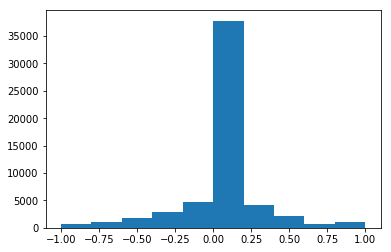

In [22]:
polarities = []

for comment in comments['Cleaned']:
    blob = TextBlob(comment)
    polarities.append(blob.sentiment.polarity)
    
    
plt.hist(polarities)

(array([  607.,  1092.,  1782.,  2904.,  4715.,  6871.,  4190.,  2142.,
          662.,  1030.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

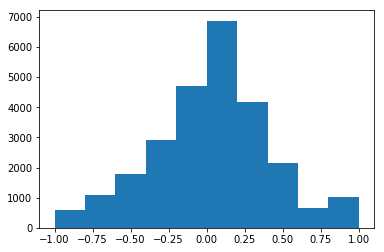

In [26]:
# list(filter(lambda a: a != 0.0, polarities))

nonzero_polarities = [value for value in polarities if value != 0.0]

plt.hist(nonzero_polarities)

In [29]:
import multiprocessing
import os
print(multiprocessing.cpu_count())
print(os.cpu_count())

4
4


In [46]:
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

In [6]:
clean_comments = []

punct = str.maketrans(string.punctuation,' '*len(string.punctuation))
for idx, comment in comments.iterrows():
    cleaned = str(comment['commentText']).translate(punct)
    clean_comments.append(cleaned.lower().replace('\n', ' ').replace('\r', '').split(' '))
    
    
    '''
    

    clean_comment = ''
    # for character in str(comment['commentText']):
        # pattern = re.compile('[\W_]+')
    lower = re.compile(r"[a-z]")
    upper = re.compile(r"[A-Z]")
    if character in punct or character == ' ':
        clean_comment += ' '
    elif character in lower.sub('', string.printable) or character in upper.sub('', string.printable):
        clean_comment += character
    clean_comments.append(clean_comment)
    
    
    '''
    
    if idx % 5000 == 0:
        print(idx)

len(clean_comments)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000


56910

In [7]:
comments['Cleaned'] = pd.Series(clean_comments)

In [73]:
# comments['Cleaned'] = comments['Cleaned'].apply(lambda x: s for s in comments['Cleaned'] if not tokenizer.vocab[str(s)].is_stop)

TypeError: 'generator' object is not callable

In [10]:
for idx, comment in comments.iterrows():
    comments['Cleaned'][idx][:] = [x for x in comments['Cleaned'][idx] if not tokenizer.vocab[str(x)].is_stop]

In [11]:
comment_polarities = []
comment_moods = []

for idx, comment in comments.iterrows():
    token_polarities = []
    token_moods = []
    for token in comments['Cleaned'][idx]:
        try:
            token_polarities.append(float(sn.polarity_intense(str(token))))
            token_moods.append(sn.moodtags(str(token)))
        except Exception as e:
            pass
    if not math.isnan(np.mean(token_polarities)): 
        comment_polarities.append(np.mean(token_polarities))
    comment_moods.append(token_moods)
    
    if idx % 5000 == 0:
        print(idx)
        
comments['Comment Polarity'] = pd.Series(comment_polarities)
comments['Comment Moods'] = pd.Series(comment_moods)

0


/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000


In [12]:
for idx, comment in comments.iterrows():
    comments['Comment Moods'][idx][:] = [item.strip('#') for sublist in comments['Comment Moods'][idx] for item in sublist]

In [169]:
comments.head()

,id,user,date,timestamp,commentText,likes,hasReplies,numberOfReplies,replies.id,replies.user,replies.date,replies.timestamp,replies.commentText,replies.likes,Cleaned,Comment Polarity,Comment Moods
0,UgxhWL_U704pCWNzCPx4AaABAg,Disruptive_Innovator,4 seconds ago,1.516661e+12,Yay Jordan B Peterson! MSM reporter was not s...,0.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"[yay, jordan, b, peterson, , , msm, reporter, ...",0.805500,"[joy, interest, joy, interest]"
1,UgwVxKFqdpMMU-VbnS94AaABAg,Gol Gulok,8 seconds ago,1.516661e+12,Jordan Peterson on the Channel 4 Controversy: ...,0.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"[jordan, peterson, channel, 4, controversy, , ...",0.272231,"[joy, interest, anger, anger, joy, admiration,..."
2,Ugw4sP8JkF-9g1bGnFN4AaABAg,Bobby Smith,1 minute ago,1.516661e+12,"This woman must be a special type of stupid, c...",0.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"[woman, special, type, stupid, , coupled, vict...",-0.111125,"[joy, interest, interest, admiration, joy, sur..."
3,UgyxXjOKQcC4pSlQogF4AaABAg,JoseitoEdlVodao,1 minute ago,1.516661e+12,Fact: The ability to think is regulated by you...,0.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"[fact, , ability, think, regulated, emotions, ...",0.296968,"[joy, interest, interest, admiration, joy, int..."
4,Ugz8alNzq7xv5CTv6Od4AaABAg,Deividas Melnikas Shtaufer,2 minutes ago,1.516661e+12,Honestly there are 25 biologicaly and biochemi...,1.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"[honestly, 25, biologicaly, biochemicaly, apro...",0.665600,"[joy, interest, joy, interest, joy, admiration..."


(array([  697.,   589.,  1044.,  2637.,  5325.,  9466.,  7178.,  3726.,
         1236.,  1484.]),
 array([-0.99  , -0.7913, -0.5926, -0.3939, -0.1952,  0.0035,  0.2022,
         0.4009,  0.5996,  0.7983,  0.997 ]),
 <a list of 10 Patch objects>)

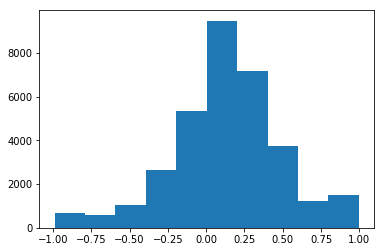

In [17]:
plt.hist(comments['Comment Polarity'].dropna())

In [174]:
comments['Comment Moods'][0:40]

0                        [joy, interest, joy, interest]
1     [joy, interest, anger, anger, joy, admiration,...
2     [joy, interest, interest, admiration, joy, sur...
3     [joy, interest, interest, admiration, joy, int...
4     [joy, interest, joy, interest, joy, admiration...
5     [joy, interest, admiration, admiration, sadnes...
6                 [joy, interest, interest, admiration]
7     [joy, surprise, joy, admiration, interest, adm...
8     [joy, surprise, sadness, fear, anger, disgust,...
9      [sadness, anger, sadness, anger, anger, disgust]
10             [interest, admiration, sadness, disgust]
11    [surprise, admiration, anger, disgust, joy, in...
12    [sadness, disgust, anger, disgust, joy, surpri...
13    [joy, admiration, anger, disgust, interest, ad...
14    [sadness, disgust, disgust, disgust, sadness, ...
15    [surprise, admiration, joy, interest, joy, int...
16    [sadness, anger, joy, admiration, interest, ad...
17    [disgust, disgust, interest, admiration, j

In [14]:
from wordcloud import WordCloud, STOPWORDS

word_string = ''
word_list = [item for sublist in comments['Comment Moods'] for item in sublist]
# word_list.sort()
word_string += ', '.join(word_list)

print(word_string[0:100])

joy, interest, joy, interest, joy, interest, anger, anger, joy, admiration, admiration, admiration, 


In [175]:
word_list[0:20]

['joy',
 'interest',
 'joy',
 'interest',
 'joy',
 'interest',
 'anger',
 'anger',
 'joy',
 'admiration',
 'admiration',
 'admiration',
 'joy',
 'interest',
 'joy',
 'interest',
 'joy',
 'interest',
 'sadness',
 'anger']

In [172]:
print(word_string[0:1000])

joy, interest, joy, interest, joy, interest, anger, anger, joy, admiration, admiration, admiration, joy, interest, joy, interest, joy, interest, sadness, anger, interest, admiration, sadness, disgust, interest, admiration, surprise, admiration, joy, interest, joy, interest, interest, admiration, joy, surprise, anger, anger, anger, disgust, anger, anger, sadness, fear, joy, interest, joy, interest, interest, admiration, joy, interest, joy, interest, joy, admiration, interest, interest, interest, admiration, joy, admiration, joy, surprise, interest, admiration, joy, interest, joy, admiration, interest, admiration, joy, admiration, joy, interest, interest, admiration, interest, admiration, joy, admiration, sadness, anger, interest, admiration, joy, interest, joy, interest, interest, admiration, joy, admiration, interest, admiration, sadness, anger, interest, interest, joy, interest, fear, disgust, sadness, anger, sadness, anger, joy, interest, joy, interest, joy, admiration, joy, admirati

In [15]:
wordcloud = WordCloud(background_color='white',
                          width=4000,
                          height=3000
                         ).generate(word_string)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

KeyboardInterrupt: 

In [16]:
wordcloud = WordCloud(background_color='white',
                          width=4000,
                          height=3000
                         ).generate_from_frequencies(mood_count)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

NameError: name 'mood_count' is not defined

In [2]:
from collections import Counter

mood_count = Counter(word_list)
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

plt.pie(mood_count.values(), labels=mood_count.keys(), autopct='%1.1f%%', explode=explode)
plt.show()

NameError: name 'word_list' is not defined

- good statistical rigor: pull JBP lectures to establish baseline of these moodtags and polarities
- pull   
- 
- https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ks_2samp.html <-- check for statistical difference between polarity distributions

In [1]:
print(mood_count)

NameError: name 'mood_count' is not defined

In [18]:
comment_polarities

[0.80549999999999999,
 0.27223076923076922,
 -0.11112500000000003,
 0.29696774193548381,
 0.66559999999999997,
 0.22599999999999998,
 0.11849999999999999,
 0.22064,
 0.093470588235294139,
 -0.85666666666666658,
 0.0055000000000000049,
 -0.02619999999999998,
 0.28242857142857142,
 0.097239999999999979,
 -0.027424242424242438,
 0.30771428571428566,
 0.28659999999999997,
 0.12614285714285714,
 0.065000000000000002,
 0.62549999999999994,
 -0.081499999999999989,
 -0.39999999999999997,
 -0.080000000000000002,
 0.90800000000000003,
 -0.070000000000000007,
 -0.21625,
 0.65344444444444449,
 0.24633333333333329,
 0.055636363636363623,
 0.031333333333333331,
 -0.080000000000000002,
 -0.24175000000000002,
 -0.13400000000000001,
 0.0076000000000000286,
 -0.080750000000000016,
 0.084199999999999997,
 -0.080000000000000002,
 -0.0015000000000000232,
 0.26440000000000002,
 0.039333333333333331,
 -0.042000000000000003,
 0.029111111111111126,
 -0.009000000000000008,
 0.18041176470588233,
 0.0612500000000

In [22]:
test = [0.24633333333333329, nan,
 0.055636363636363623,
 0.031333333333333331,nan,
 -0.080000000000000002,
 -0.24175000000000002, nan,
 -0.13400000000000001,
 0.0076000000000000286,nan,
 -0.080750000000000016,nan,
 0.084199999999999997,
 -0.080000000000000002,
 -0.0015000000000000232,
 0.26440000000000002,]

test2 = [0.24633333333333329,
 0.055636363636363623,
 0.031333333333333331,
 -0.080000000000000002,
 -0.24175000000000002,
 -0.13400000000000001,
 0.0076000000000000286,
 -0.080750000000000016,
 0.084199999999999997,
 -0.080000000000000002,
 -0.0015000000000000232,
 0.26440000000000002,]

NameError: name 'nan' is not defined

In [26]:
for item in comments['Cleaned'][5]:
    try:
        print(sn.polarity_intense(str(item)))
    except Exception as e:
        print(e)

0.831
0.082
''
''
''
'won'
't'
-0.36
''
''
's'
0.351
''
''
''
'https'
''
''
'youtu'
'zbdnyrzq96s'
